In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Open the data files

### Description of the data. 

The files ending in ```...OND_days.nc``` include the number of days in Oct-Nov-Dec with tasmax between 0-10K. 

The files ending in ```...pr_AMJJ.nc``` include the average rate of daily precipitation in the months Apr-May-Jun-Jul. 


This data is calculated with the script ```iets.sh```. 

## For LENTIS present-day

In [2]:
file_t="/net/pc200021/nobackup_1/users/muntjewe/temp/h*_OND_days.nc"
file_p="/net/pc200021/nobackup_1/users/muntjewe/temp/h*_pr_AMJJ.nc"
ds_t = xr.open_mfdataset(file_t,combine='nested',concat_dim='ens')
ds_p = xr.open_mfdataset(file_p,combine='nested',concat_dim='ens')

## For ERA 

In [3]:
ERA_files_t="/net/pc200021/nobackup_1/users/muntjewe/temp/*_ERA_OND_days.nc"
ERA_files_p="/net/pc200021/nobackup_1/users/muntjewe/temp/*_ERA_pr_AMJJ.nc"
ds_ERA_t = xr.open_mfdataset(ERA_files_t)
ds_ERA_p = xr.open_mfdataset(ERA_files_p)

### Select a rectangle over France
Open this data. 
Multiply LENTIS precip data to convert to mm/day, like ERA

In [4]:
mult = 60*60*24

lat1=47
lat2=50
lon1=0
lon2=7

ndays = ds_t.tasmax.sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2)).isel(time=slice(0,9))
avgp = ds_p.pr.sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2))*mult

era_ndays=ds_ERA_t.tmax.sel(lat=slice(lat2,lat1),lon=slice(lon1,lon2))
era_avgp=ds_ERA_p.tp.sel(lat=slice(lat2,lat1),lon=slice(lon1,lon2))

# Plot the data

<div class="alert alert-block alert-warning">
To plot the data, it is most important to mind that #vernalizing days of <b>year n</b> is paired with precip rates of <b>year n+1</b>. 
</div>


For Lentis, this is taken care of in the opening statement of ndays by adding ```.isel(time=slice(0,9))``` (in cell above). 

For ERA, this is taken care automatically sinds the data for autumn 2022 is not available yet. So this data runs from 1950-fall ... 2021-fall for OND_days, and 1951-spring ... 2022-spring for pr_AMJJ. (check by running ```ds_ERA_p.tp``` or ```ds_ERA_t.tmax```

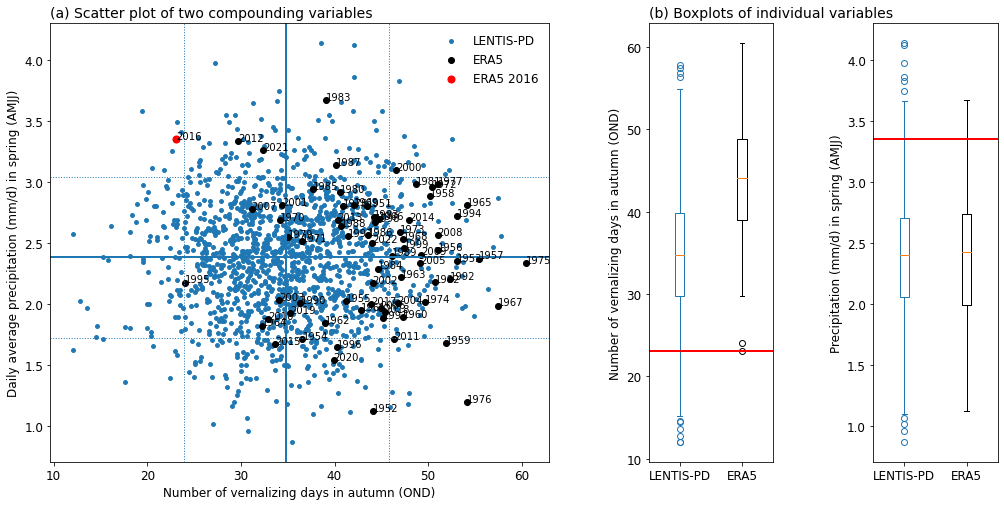

In [14]:
# ============================ fig specs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,7), gridspec_kw={'width_ratios': [4,1,1]})
plt.subplots_adjust(left=0.05, bottom=0.08, right=.99, top=0.95, wspace=.4)
c='tab:blue'



# ========== plot 1 (ax1)
# scatter plot LENTIS and ERA data
# make sure to average over the appropriate axes. 
ax1.scatter(np.mean(ndays,axis=[2,3]),np.mean(avgp,axis=[2,3]),s=15,label='LENTIS-PD')
ax1.scatter(np.mean(era_ndays,axis=[1,2]),np.mean(era_avgp,axis=[1,2]),color = 'k',marker='o',label='ERA5')

# add 2016 ERA data as a red dot
ax1.scatter(np.mean(era_ndays,axis=[1,2])[2016-1951],np.mean(era_avgp,axis=[1,2])[2016-1951],color = 'r',s=50,label='ERA5 2016')

# add labels of the year to the ETA data (the pairs run from 19501-2022). 
n = np.arange(1951,2023)
for i, txt in enumerate(n):
    ax1.annotate(txt, (np.mean(era_ndays,axis=[1,2])[i], np.mean(era_avgp,axis=[1,2])[i]),fontsize=10)


# --- plot in avg +- std.dev LENTIS data
ax1.axhline(y = np.mean(avgp).values,  linestyle = '-',  linewidth=2)
ax1.axvline(x = np.mean(ndays).values, linestyle = '-',  linewidth=2)

ax1.axhline(y = np.mean(avgp).values + np.std(avgp).values, linestyle = ':',  linewidth=1)
ax1.axhline(y = np.mean(avgp).values - np.std(avgp).values,  linestyle = ':',  linewidth=1)
ax1.axvline(x = np.mean(ndays).values + np.std(ndays).values, linestyle = ':',  linewidth=1)
ax1.axvline(x = np.mean(ndays).values - np.std(ndays).values,  linestyle = ':',  linewidth=1)


# ax1 settings
ax1.set_title('(a) Scatter plot of two compounding variables', fontsize=14, loc='left')
ax1.set_xlabel('Number of vernalizing days in autumn (OND)', fontsize=12)
ax1.set_ylabel('Daily average precipitation (mm/d) in spring (AMJJ)', fontsize=12)
ax1.legend(frameon=False,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)


# ========== plot 2 (ax2)

# box plot of LENTIS and ERA # of vernalizing days. 
# color LENTIS blue
ax2.boxplot(np.mean(ndays,axis=[2,3]).values.flatten(), positions=[1],showfliers=True,patch_artist=True, 
            boxprops=dict(facecolor='white', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),)
ax2.boxplot(np.mean(era_ndays,axis=[1,2]).values.flatten(),  positions=[2],showfliers=True)

# add in red line for the ERA value at 2016
ax2.axhline(y = np.mean(era_ndays,axis=[1,2])[2016-1951].values, color = 'r',  linewidth=2, label='2016')

# ax2 settings
ax2.set_title('(b) Boxplots of individual variables', fontsize=14, loc='left')
ax2.set_ylabel('Number of vernalizing days in autumn (OND)', fontsize=12)
ax2.set_xticklabels(['LENTIS-PD','ERA5'])
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
#ax2.legend(loc='lower right',frameon=False,fontsize=12)




# ========== plot 3 (ax3)

# box plot of LENTIS and ERA avg precip rate
# color LENTIS blue
ax3.boxplot(np.mean(avgp,axis=[2,3]).values.flatten(), positions=[1],showfliers=True,patch_artist=True, 
            boxprops=dict(facecolor='white', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),)
ax3.boxplot(np.mean(era_avgp,axis=[1,2]).values.flatten(),  positions=[2],showfliers=True)

# add in red line for the ERA value at 2016
ax3.axhline(y = np.mean(era_avgp,axis=[1,2])[2016-1951].values, color = 'r',  linewidth=2, label='2016')

# ax3 settings
ax3.set_ylabel('Precipitation (mm/d) in spring (AMJJ)', fontsize=12)
ax3.set_xticklabels(['LENTIS-PD','ERA5'])
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
#ax3.legend(loc='lower right',frameon=False,fontsize=12)

plt.savefig('fig_example_compound.pdf')
plt.show()